In [27]:
import re
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
from pylab import *
from decimal import Decimal
from sklearn import cross_validation
from sklearn.cross_validation import KFold
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
%matplotlib inline

In [3]:
def load_data(filename):
    ''' load data and plot the data and get the complexity of the data
    dictionary maps y to its feature vector x'''
    f = open(filename,'r')
    rows = 0
    colums = 0
    xy = defaultdict(list)
    for word in f:
        if word == " ":
            break
        if not word.startswith("#"):
            nums = word.split()
            nums = [float(n) for n in nums]
            xy[float(nums[-1])] = nums[0:len(nums)-1]
    return xy
                
                

In [8]:
sset1 = load_data("svar-set1.dat.txt")

In [37]:
sset2 = load_data("svar-set2.dat.txt")

In [38]:
sset3 = load_data("svar-set3.dat.txt")

In [39]:
sset4 = load_data("svar-set4.dat.txt")

In [ ]:
print len(sset1) , " " , len(sset2) , " " , len(sset3) , " " , len(sset4)

In [93]:
def plot_data(data,y_predict,poly):
    '''This function takes a dictionary of the data loaded from the files'''
    x = list()
    y = list()
    # making a list of all feature values
    for d1 in data.values():
        for d2 in d1:
            x.append(d2)
    # making a list of all label values
    for d1 in data.keys():
        y.append(d1)
    plt.show()
    if (y_predict is not None and poly==0):
        plt.plot(x,y,'ro')
        plt.plot(x,y_predict)
    elif(y_predict is not None and poly>0):
        plt.plot(x,y,'ro')
        coefficients = polyfit(x, y_predict, poly)
        polynomial = poly1d(coefficients)
        plt.plot(x,y_predict,'o')
    else:
        plt.plot(x,y,'ro')
    plt.show()

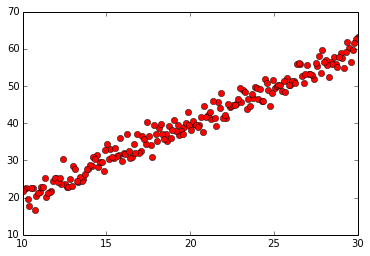

In [85]:
plot_data(sset1,None,0)

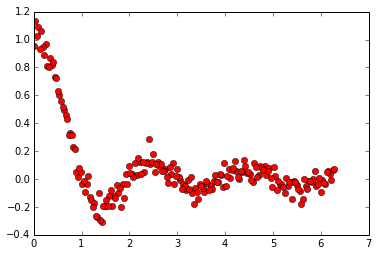

In [87]:
plot_data(sset2,None,0)

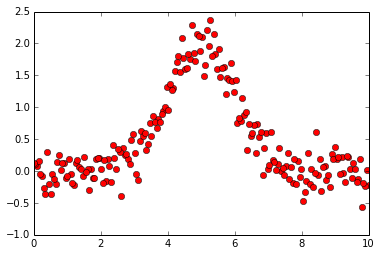

In [88]:
plot_data(sset3,None,0)

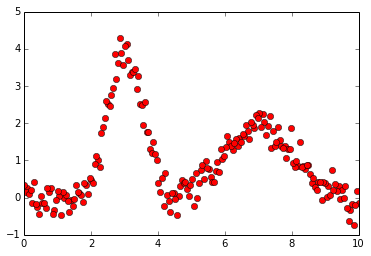

In [89]:
plot_data(sset4,None,0)

In [5]:
def fit_single_feature_linear_model(data):
    '''fit linear model with the data
       compute training and testing error
       plot regression model on testing data'''
    x = list()
    y = data.keys()
    m = len(y)
    for d1 in data.values():
        for d2 in d1:
            x.append(d2)
    sum_of_xi = sum(x) 
    sum_of_xi2 = sum([d**2 for d in x])
    sum_of_yi = sum(y)
    sum_of_xiyi =  sum([x[i]*y[i] for i in range(len(x))])
    print 'm:', m
    print 'sum(x) : ' , sum_of_xi 
    print 'sum(x2): ' , sum_of_xi2
    print 'sum(y) : ', sum_of_yi 
    print 'sum(y2): ', sum_of_xiyi
    A = np.matrix([[m, sum_of_xi], [sum_of_xi, sum_of_xi2]])
    B = np.matrix([[sum_of_yi],[sum_of_xiyi]])
    theta = solve(A,B)
    return theta

In [ ]:
# theta_sset1 = fit_single_feature_linear_model(sset1)

In [ ]:
# theta_sset2 = fit_single_feature_linear_model(sset2)

In [ ]:
# theta_sset3 = fit_single_feature_linear_model(sset3)

In [ ]:
# theta_sset4 = fit_single_feature_linear_model(sset4)

In [13]:
def predict_y(x,theta):
#     theta0 = theta[0][0]
#     theta1 = theta[1][0]
#     print 'theta0', (theta0)
#     print 'theta1', (theta1)
#     x = list()
#     for d1 in data.values():
#         for d2 in d1:
#             x.append(d2)
    X = np.array(x)
    Y_predict = theta[0] + X*theta[1]
    return Y_predict

In [ ]:
# Y_sset1 = predict_y(sset1,
#                     np.array(theta_sset1))

In [ ]:
# Y_sset1

In [ ]:
# Y_sset2 = predict_y(sset2,np.array(theta_sset2))

In [ ]:
# Y_sset3 = predict_y(sset3,np.array(theta_sset3))

In [ ]:
# Y_sset4 = predict_y(sset4,np.array(theta_sset4))

In [ ]:
# plot_data(sset1,Y_sset1)
    

In [ ]:
# plot_data(sset2,Y_sset2)

In [ ]:
# plot_data(sset3,Y_sset3)

In [ ]:
# plot_data(sset4,Y_sset4)

In [34]:
def do_experiment(data,folds):
    #************************** do RMSE ************************
#     data = load_data(filename)
    # fit model and obtain theta value
    x = data.values()
    y = data.keys()
    theta = fit_single_feature_linear_model(data)
    Y_predict = predict_y(x,np.array(theta))
    avg_train_err = 0
    avg_test_err = 0
    avg_regr_test_err = 0
    avg_regr_train_err = 0
    regr = linear_model.LinearRegression()
    fold = 1
   
    for train_ind, test_ind in KFold(len(y), folds,shuffle=True):
        X_train = np.array(x)[train_ind]
        Y_train = np.array(y)[train_ind]
        X_test = np.array(x)[test_ind]
        Y_test = np.array(y)[test_ind]
        
        Y_predict_train = predict_y(X_train,np.array(theta))
        train_error =  mean_squared_error(Y_train, Y_predict_train) 
        avg_train_err += train_error
        
        
        Y_predict_test = predict_y(X_test,np.array(theta))
        test_error = mean_squared_error(Y_test,Y_predict_test)
        avg_test_err += test_error
        
        print 'fold: ', fold, 'train_err: ', train_error, 'test_err: ', test_error
    
        #comparing model with the python function
        regr.fit(X_train,Y_train)
        
        Y_predict_regr_train = regr.predict(X_train)
        regr_train_error = mean_squared_error(Y_train,Y_predict_regr_train)
        avg_regr_train_err += regr_train_error
        
        Y_predict_regr_test = regr.predict(X_test)
        regr_test_error = mean_squared_error(Y_test,Y_predict_regr_test)
        avg_regr_test_err += regr_test_error
        
        print 'fold: ', fold, 'regr_train_err: ', regr_train_error, 'regr_test_err: ', regr_test_error
        print ' '
        fold += 1
    
    avg_train_err /= folds
    avg_test_err /= folds
    avg_regr_train_err /= folds
    avg_regr_test_err /= folds
    
    print 'folds: ', folds
    print 'avg_train_err: ' , avg_train_err, 'avg_test_err: ', avg_test_err
    print 'avg_regr_train_err: ',  avg_regr_train_err, 'avg_regr_test_err: ', avg_regr_test_err
    print 'Regression coefficient: ', regr.coef_
    
    
    

In [35]:
do_experiment(sset1,10)

m: 200
sum(x) :  4000.0
sum(x2):  86733.6683417
sum(y) :  7996.65094195
sum(y2):  173306.774845
fold:  1 train_err:  4.29685369666 test_err:  3.6540228875
fold:  1 regr_train_err:  4.29520647268 regr_test_err:  3.68568946857
 
fold:  2 train_err:  4.16792054719 test_err:  4.81442123274
fold:  2 regr_train_err:  4.16767042495 regr_test_err:  4.81912644557
 
fold:  3 train_err:  4.21991733813 test_err:  4.34645011428
fold:  3 regr_train_err:  4.21587072461 regr_test_err:  4.42508419713
 
fold:  4 train_err:  4.15909394857 test_err:  4.89386062036
fold:  4 regr_train_err:  4.15553868477 regr_test_err:  4.96032822922
 
fold:  5 train_err:  4.15392638208 test_err:  4.94036871877
fold:  5 regr_train_err:  4.14338695558 regr_test_err:  5.14307221262
 
fold:  6 train_err:  4.21593661554 test_err:  4.38227661757
fold:  6 regr_train_err:  4.20404805755 regr_test_err:  4.60643330371
 
fold:  7 train_err:  4.34472275275 test_err:  3.2232013827
fold:  7 regr_train_err:  4.33637384379 regr_test_err:

In [40]:
do_experiment(sset2,10)

m: 200
sum(x) :  628.318530718
sum(x2):  2638.50730723
sum(y) :  17.6758698361
sum(y2):  3.8990224848
fold:  1 train_err:  0.0578807978031 test_err:  0.0747988855594
fold:  1 regr_train_err:  0.057807317406 regr_test_err:  0.0761936090688
 
fold:  2 train_err:  0.0582102615841 test_err:  0.07183371153
fold:  2 regr_train_err:  0.0582059220525 regr_test_err:  0.0719162725677
 
fold:  3 train_err:  0.0596732602224 test_err:  0.0586667237856
fold:  3 regr_train_err:  0.0593821481283 regr_test_err:  0.0642070247189
 
fold:  4 train_err:  0.0580414043859 test_err:  0.0733534263139
fold:  4 regr_train_err:  0.0580231550233 regr_test_err:  0.0736958280841
 
fold:  5 train_err:  0.0603282690131 test_err:  0.0527716446693
fold:  5 regr_train_err:  0.0602442781018 regr_test_err:  0.0543518765156
 
fold:  6 train_err:  0.0577731069469 test_err:  0.0757681032651
fold:  6 regr_train_err:  0.0577648033452 regr_test_err:  0.0759254442271
 
fold:  7 train_err:  0.0645341988247 test_err:  0.01491827636

In [41]:
do_experiment(sset3,10)

m: 200
sum(x) :  1000.0
sum(x2):  6683.41708543
sum(y) :  97.8568834595
sum(y2):  485.333769493
fold:  1 train_err:  0.49632798681 test_err:  0.520187016408
fold:  1 regr_train_err:  0.495961629128 regr_test_err:  0.527054408433
 
fold:  2 train_err:  0.505531969193 test_err:  0.437351174957
fold:  2 regr_train_err:  0.505422591358 regr_test_err:  0.439437426366
 
fold:  3 train_err:  0.518269564802 test_err:  0.322712814482
fold:  3 regr_train_err:  0.517661590675 regr_test_err:  0.334261719399
 
fold:  4 train_err:  0.509784641933 test_err:  0.399077120299
fold:  4 regr_train_err:  0.509508292381 regr_test_err:  0.404364042227
 
fold:  5 train_err:  0.487466406043 test_err:  0.599941243313
fold:  5 regr_train_err:  0.487196057863 regr_test_err:  0.605069808154
 
fold:  6 train_err:  0.489352341076 test_err:  0.582967828017
fold:  6 regr_train_err:  0.489344262021 regr_test_err:  0.583122413247
 
fold:  7 train_err:  0.486058344637 test_err:  0.61261379596
fold:  7 regr_train_err:  0.

In [42]:
do_experiment(sset4,10)

m: 200
sum(x) :  1000.0
sum(x2):  6683.41708543
sum(y) :  194.18206936
sum(y2):  961.865385516
fold:  1 train_err:  1.26434282596 test_err:  0.628995309326
fold:  1 regr_train_err:  1.26090097471 regr_test_err:  0.694921980714
 
fold:  2 train_err:  1.1552007234 test_err:  1.6112742323
fold:  2 regr_train_err:  1.15416606749 regr_test_err:  1.63061366898
 
fold:  3 train_err:  1.22758673898 test_err:  0.959800092121
fold:  3 regr_train_err:  1.2257958468 regr_test_err:  0.994324349207
 
fold:  4 train_err:  1.19783717822 test_err:  1.22754613893
fold:  4 regr_train_err:  1.19668960808 regr_test_err:  1.24917182095
 
fold:  5 train_err:  1.19572785363 test_err:  1.24653006026
fold:  5 regr_train_err:  1.19535002312 regr_test_err:  1.25365468121
 
fold:  6 train_err:  1.15517245688 test_err:  1.61152863097
fold:  6 regr_train_err:  1.15496427085 regr_test_err:  1.61546052592
 
fold:  7 train_err:  1.2127438257 test_err:  1.09338631165
fold:  7 regr_train_err:  1.21181414007 regr_test_err

In [75]:
def solve_single_feature_multinomial(data,n):
    X = data.values()
    y = data.keys()
    Z = np.matrix([])
    x = list()
    z = list()
    for d1 in data.values():
        for d2 in d1:
            x.append(d2)
    for d in x:
        temp = [d**i for i in range(n+1)]
        z.append(temp)
        
    Z = np.array(z)
    ZT = np.transpose(Z.copy())
#     print Z.shape
#     print ZT.shape
    ZTZ = dot(ZT,Z)
    ZTZinv = inv(ZTZ)
#     print ZTZ.shape
#     print ZTZinv.shape
    Y = np.array(y)
    theta = dot(dot(ZTZinv,ZT),Y)
    thetaT = np.transpose(theta.copy())
    print 'theta',theta.shape
    print 'thetaT', thetaT.shape
    print Z.shape
    Y_predict = dot(thetaT,ZT)
    plot_data(data,Y_predict,n)   

theta (9,)
thetaT (9,)
(200, 9)


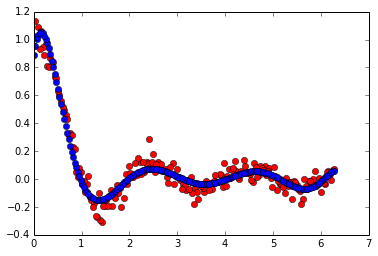

In [101]:
solve_single_feature_multinomial(sset2,8)

theta (7,)
thetaT (7,)
(200, 7)


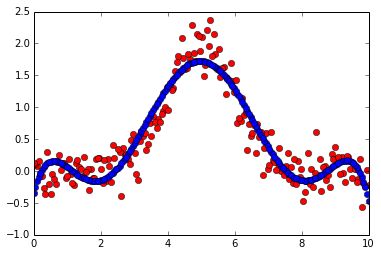

In [94]:
solve_single_feature_multinomial(sset3,6)

theta (8,)
thetaT (8,)
(200, 8)


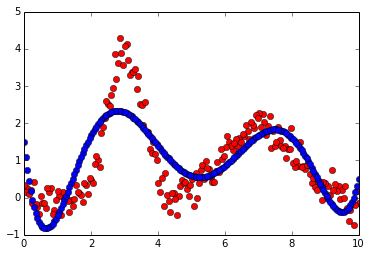

In [106]:
solve_single_feature_multinomial(sset4,7)